In [13]:
import math 
import numpy as np 
import matplotlib.pyplot as plt 

In [14]:
def f( y , t): 
    fx = y[1] 
    fv = y[1]**2 - y[0] - 5 
    return np.array([fx , fv ])

def leapfrog( t0 , tn , y0 , f , h = 0.001 ): 
    t = np.arange( t0 , tn , h  )
    y = np.zeros( ( t.size , y0.size ))
    y[0] = y0 
    for i in range( 1 , t.size ): 
        ytemp = y[i-1] + (h/2)*f( y[i-1] , t[i-1] )
        y[i] = y[i-1] + h*f( ytemp , t[i-1] + h/2 )
    return y , t 

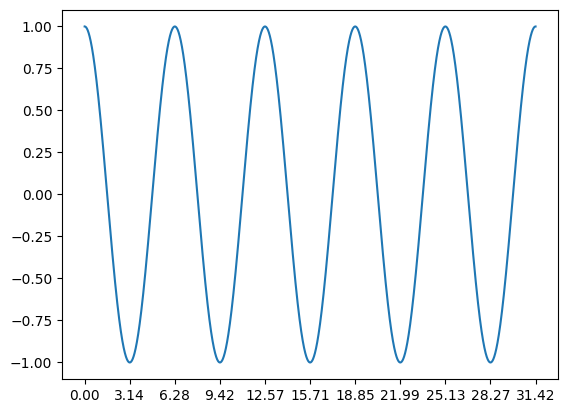

In [15]:
# test 
def ftest( y , t ): 
    fx = y[1]
    fv = -y[0]
    return np.array( [ fx , fv ])

y , t = leapfrog( 0 , 10*np.pi , np.array([1, 0 ]) , ftest , h = 0.001 )

plt.plot( t , y[: , 0 ])
plt.xticks( [np.pi*i for i in range( 11 )])
plt.show()


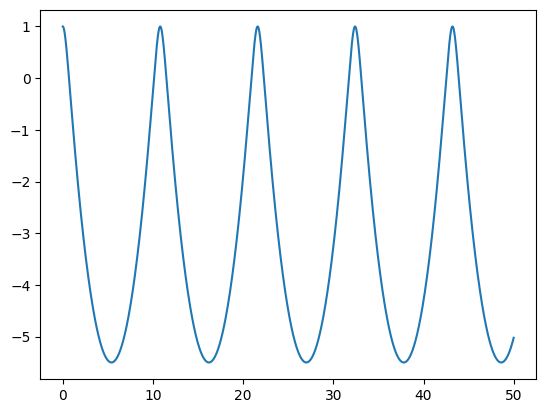

In [16]:
y , t = leapfrog( 0 , 50 , np.array([1 , 0 ]) , f )
plt.plot( t , y[: , 0 ])
plt.show()

In [17]:
def RK4( t0 , tn , y0 , f  , n = 100  ): 
    t = np.linspace( t0 , tn , n )
    h = ( tn - t0 )/n 
    y = np.zeros( shape = ( n , y0.size   ))
    y[0 , : ] = y0 
    for i in range( 1 , n ): 
        k1 = h*f(y[i-1],t[i-1])
        k2 = h*f(y[i-1]+k1/2 ,t[i-1]+h/2)
        k3 = h*f(y[i-1]+k2/2 ,t[i-1]+h/2)
        k4 = h*f(y[i-1]+k3, t[i-1]+h)
        y[i] = y[i-1] + (k1 + 2*k2 + 2*k3 +k4)/6
    return y , t 

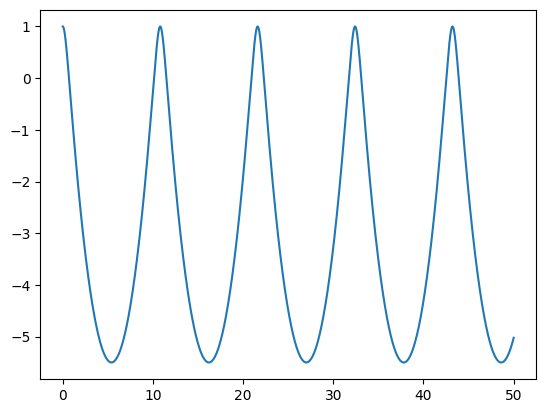

In [18]:
y , t = RK4( 0 , 50 , np.array([1 , 0 ]) , f , n = int( 50/0.001))
plt.plot( t , y[: , 0 ])
plt.show()

In [19]:
# the verlet method : 

def verlet( t0 , tn , y0 , v0 , f , h = 60*60 ): 
    t = np.arange( t0 , tn , h )
    y = np.zeros((t.size , y0.size ))
    y[0] = y0 
    y[1] = y[0] + v0*h + f(y0,t)*(h**2)/2
    for i in range( 2 , t.size ): 
        y[i] = 2*y[i-1] - y[i-2] + f(y[i-1],t)*(h**2)
    return y , t 


In [70]:
from astropy.constants import G , M_sun , M_earth 
G = G.value 
M = M_sun.value
Me = M_earth.value 

In [71]:
print( G , M , Me )

6.6743e-11 1.988409870698051e+30 5.972167867791379e+24


In [58]:
def f( y , t ): 
    r3 = np.sum( np.square( y ))**( 3/2 )
    return -G*M*y/r3 

T = 365*24*60*60 # 1 year 
y0 = np.array([-1.4710e11, 0 ] , dtype = np.float64 )
v0 = np.array([0 , 3.0287e4] , dtype = np.float64 )
y , t = verlet(0 , 1*T , y0 , v0 , f )

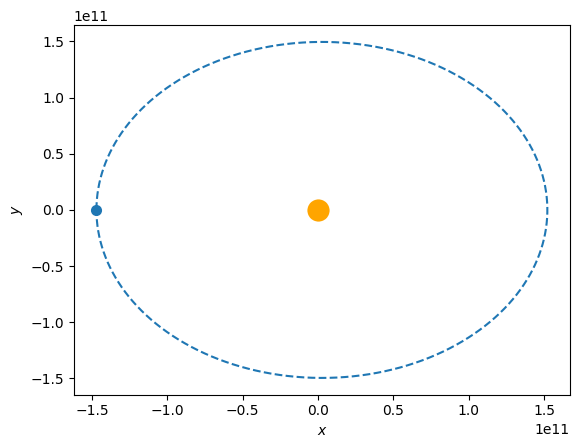

In [69]:
plt.plot( y[: , 0 ] , y[: , 1 ] , '--')
plt.scatter( y[0,0] , y[0 , 1 ] , marker = 'o' , linewidths= 2 ) 
plt.scatter( 0 , 0 , marker = 'o' , color  = 'orange' , linewidth = 10   )
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

In [82]:
# the verlet method : 

def verlet_for_earth( t0 , tn , y0 , v0 , f , h = 60*60 ): 
    t = np.arange( t0 , tn , h )
    y = np.zeros((t.size , y0.size ))
    v = np.zeros((t.size , y0.size ))
    U = np.zeros(t.size)
    K = np.zeros(t.size)
    v[0] = v0 
    y[0] = y0 
    y[1] = y[0] + v0*h + f(y0,t)*(h**2)/2
    v[1] = v[0] + h*f( y[0] , t )
    U[0] = -G*M*Me/((np.sum(np.square(y0)))**(1/2))
    K[0] = (Me/2)*np.sum(np.square(v0))
    U[1] = -G*M*Me/((np.sum(np.square(y[1])))**(1/2))
    K[1] = (Me/2)*np.sum(np.square(v[1]))
    for i in range( 2 , t.size ): 
        y[i] = 2*y[i-1] - y[i-2] + f(y[i-1],t)*(h**2)
        v[i] = v[i-1] + h*f(y[i-1] , t )
        U[i] = -G*M*Me/((np.sum(np.square(y[i])))**(1/2))
        K[i] = (Me/2)*np.sum(np.square(v[i]))
    return y , t , U , K 

y , t , U , K = verlet_for_earth(0 , 2*T , y0 , v0 , f )

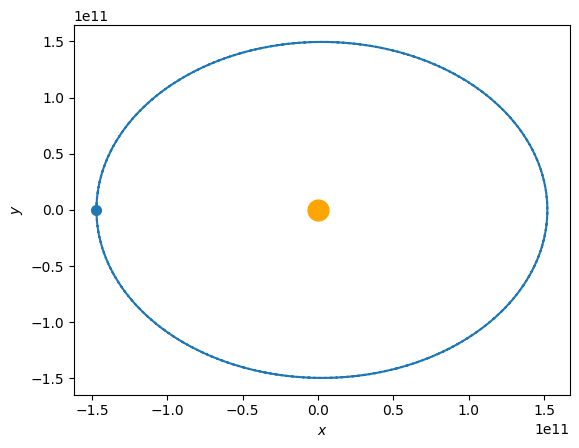

In [83]:
plt.plot( y[: , 0 ] , y[: , 1 ] , '--')
plt.scatter( y[0,0] , y[0 , 1 ] , marker = 'o' , linewidths= 2 ) 
plt.scatter( 0 , 0 , marker = 'o' , color  = 'orange' , linewidth = 10   )
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

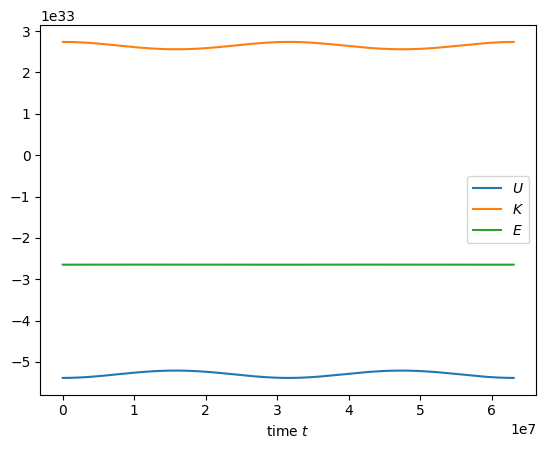

In [87]:
plt.plot( t , U , label = r'$U$')
plt.plot( t , K , label = r'$K$')
plt.plot( t , U+K , label = '$E$')
plt.xlabel(r'time $t$')
# plt.ylabel(r'$y$')
plt.legend()
plt.show()

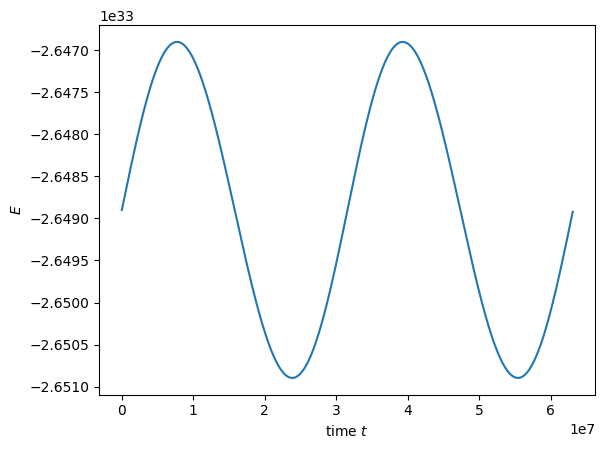

In [89]:
plt.plot( t , U+K)
plt.xlabel(r'time $t$')
plt.ylabel(r'$E$')
plt.show()